In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pathlib
from google.colab import drive
drive.mount('/content/gdrive')
data_dir = "/content/gdrive/My Drive/Colab Notebook/dataset/"
data_dir = pathlib.Path(data_dir)

Mounted at /content/gdrive


# নতুন বিভাগ

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/client/session.py:1793: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import pandas as pd
import seaborn as sn
import tensorflow as tf
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path ='/content/gdrive/MyDrive/Colab Notebooks/dataset/Train/Train'
valid_path = '/content/gdrive/MyDrive/Colab Notebooks/dataset/Validation/Validation'
test_path = '/content/gdrive/MyDrive/Colab Notebooks/dataset/Test/Test'

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/gdrive/MyDrive/Colab Notebooks/dataset/Train/Train/*')

In [ ]:
x = Flatten()(inception.output)
x = Dense(1024,activation='relu')(x)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dataset = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_dataset = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_dataset = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_dataset.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_set = valid_dataset.flow_from_directory(valid_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_dataset.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 1,
                                            class_mode = 'categorical')

Found 1960 images belonging to 8 classes.
Found 640 images belonging to 8 classes.
Found 640 images belonging to 8 classes.


In [ ]:
training_set = train_dataset.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_set = valid_dataset.flow_from_directory(valid_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_dataset.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 1,
                                            class_mode = 'categorical')

Found 1960 images belonging to 8 classes.
Found 640 images belonging to 8 classes.
Found 640 images belonging to 8 classes.


In [ ]:
r = model.fit(
  training_set,
  validation_data=validation_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set)
)

Epoch 1/15
62/62 [==============================] - 787s 13s/step - loss: 6.3170 - accuracy: 0.8372 - val_loss: 0.8654 - val_accuracy: 0.9500
Epoch 2/15
62/62 [==============================] - 48s 774ms/step - loss: 0.9317 - accuracy: 0.9485 - val_loss: 0.9358 - val_accuracy: 0.9391
Epoch 3/15
62/62 [==============================] - 58s 942ms/step - loss: 0.6557 - accuracy: 0.9515 - val_loss: 0.7814 - val_accuracy: 0.9422
Epoch 4/15
62/62 [==============================] - 58s 937ms/step - loss: 0.3065 - accuracy: 0.9745 - val_loss: 0.8253 - val_accuracy: 0.9531
Epoch 5/15
62/62 [==============================] - 48s 771ms/step - loss: 0.4091 - accuracy: 0.9714 - val_loss: 0.4248 - val_accuracy: 0.9719
Epoch 6/15
62/62 [==============================] - 49s 786ms/step - loss: 0.3595 - accuracy: 0.9776 - val_loss: 0.2452 - val_accuracy: 0.9781
Epoch 7/15
62/62 [==============================] - 58s 944ms/step - loss: 0.3240 - accuracy: 0.9745 - val_loss: 1.2954 - val_accuracy: 0.9406


In [ ]:
r = model.fit(
  training_set,
  validation_data=validation_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set)
)

Epoch 1/15
62/62 [==============================] - 58s 942ms/step - loss: 0.2524 - accuracy: 0.9816 - val_loss: 0.4769 - val_accuracy: 0.9688
Epoch 2/15
62/62 [==============================] - 48s 777ms/step - loss: 0.1567 - accuracy: 0.9878 - val_loss: 0.8039 - val_accuracy: 0.9547
Epoch 3/15
62/62 [==============================] - 51s 825ms/step - loss: 0.1707 - accuracy: 0.9867 - val_loss: 1.3064 - val_accuracy: 0.9375
Epoch 4/15
62/62 [==============================] - 47s 768ms/step - loss: 0.1573 - accuracy: 0.9872 - val_loss: 0.9940 - val_accuracy: 0.9594
Epoch 5/15
62/62 [==============================] - 48s 779ms/step - loss: 0.0876 - accuracy: 0.9929 - val_loss: 0.4784 - val_accuracy: 0.9688
Epoch 6/15
62/62 [==============================] - 54s 879ms/step - loss: 0.0405 - accuracy: 0.9964 - val_loss: 0.6608 - val_accuracy: 0.9688
Epoch 7/15
62/62 [==============================] - 48s 777ms/step - loss: 0.1497 - accuracy: 0.9913 - val_loss: 0.3105 - val_accuracy: 0.9828

In [ ]:
from tensorflow.keras.models import load_model
model.save('model_inception.h5')

In [ ]:
test_loss,test_acc = model.evaluate(test_set, verbose=1)
print('\nTest accuracy:', test_acc)

640/640 [==============================] - 211s 328ms/step - loss: 0.5882 - accuracy: 0.9812

Test accuracy: 0.981249988079071


In [ ]:
test_loss,test_acc = model.evaluate(test_set, verbose=1)
print('\nTest accuracy:', test_acc)

640/640 [==============================] - 11s 18ms/step - loss: 0.5882 - accuracy: 0.9812

Test accuracy: 0.981249988079071


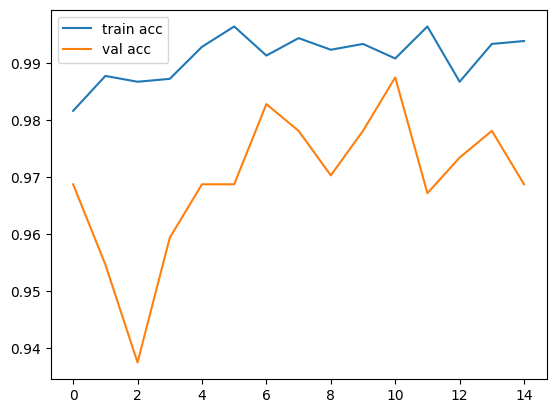

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

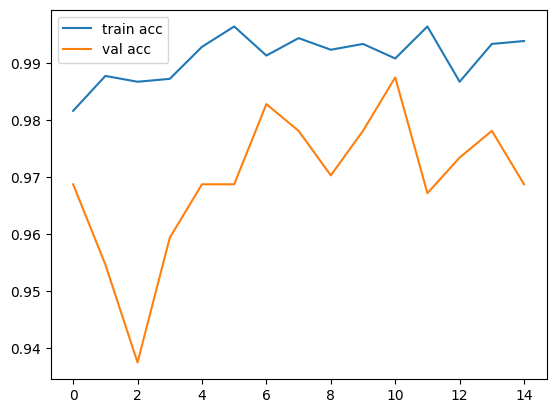

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

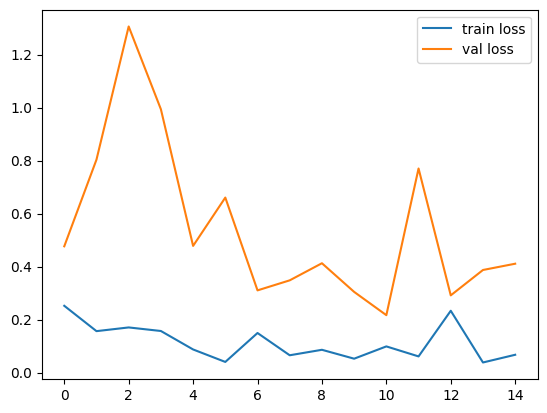

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

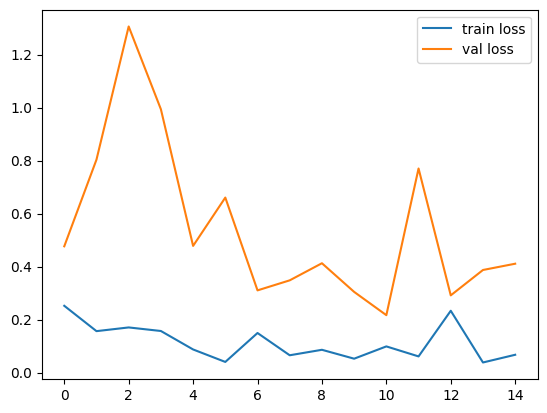

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [ ]:
nb_samples = len(test_set)
print(nb_samples)

640


In [ ]:
nb_samples = len(test_set)
print(nb_samples)

640


In [ ]:
model = tf.keras.models.load_model("model_inception.h5")
filenames = test_set.filenames
#nb_samples = len(test_set)
y_prob=[]
y_act=[]
test_set.reset()
for _ in range(nb_samples):
  X_test,Y_test = test_set.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(training_set.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(training_set.class_indices.keys())[i.argmax()] for i in y_act]


out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap='Blues', annot=True,fmt='d')
plt.show()
print('test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

OSError: ignored

In [ ]:
model = tf.keras.models.load_model("model_inception.h5")
filenames = test_set.filenames
#nb_samples = len(test_set)
y_prob=[]
y_act=[]
test_set.reset()
for _ in range(nb_samples):
  X_test,Y_test = test_set.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(training_set.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(training_set.class_indices.keys())[i.argmax()] for i in y_act]


out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap='Blues', annot=True,fmt='d')
plt.show()
print('test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))